In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,confusion_matrix,accuracy_score,recall_score,f1_score,roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor


plt.rcParams['figure.figsize'] = (10, 6)

In [15]:
# ^ Create a small dataset
data = {
    "weather": [
        "sunny",
        "sunny",
        "sunny",
        "rainy",
        "rainy",
        "rainy",
        "rainy",
        "sunny",
        "sunny",
        "rainy",
        "sunny",
        "sunny",
        "rainy",
        "rainy",
    ],
    "windy": [
        False,
        True,
        False,
        False,
        False,
        True,
        True,
        False,
        False,
        False,
        True,
        True,
        False,
        True,
    ],
    "play": [
        "no",
        "no",
        "yes",
        "yes",
        "yes",
        "no",
        "yes",
        "no",
        "yes",
        "yes",
        "yes",
        "yes",
        "yes",
        "no",
    ],
}

df = pd.DataFrame(data)
print(df)

   weather  windy play
0    sunny  False   no
1    sunny   True   no
2    sunny  False  yes
3    rainy  False  yes
4    rainy  False  yes
5    rainy   True   no
6    rainy   True  yes
7    sunny  False   no
8    sunny  False  yes
9    rainy  False  yes
10   sunny   True  yes
11   sunny   True  yes
12   rainy  False  yes
13   rainy   True   no


In [16]:

# ^ Encode categorical features 
df['weather'] = df['weather'].map({'sunny': 1, 'rainy': 0})
df['play'] = df['play'].map({'yes': 1, 'no': 0})
df['windy'] = df['windy'].astype(int)

X = df[['weather', 'windy']]
y = df['play']


In [17]:

# ^ Train a simple decision tree
tree = DecisionTreeRegressor(max_depth=3,random_state=42)
tree.fit(X, y)

DecisionTreeRegressor(max_depth=3, random_state=42)

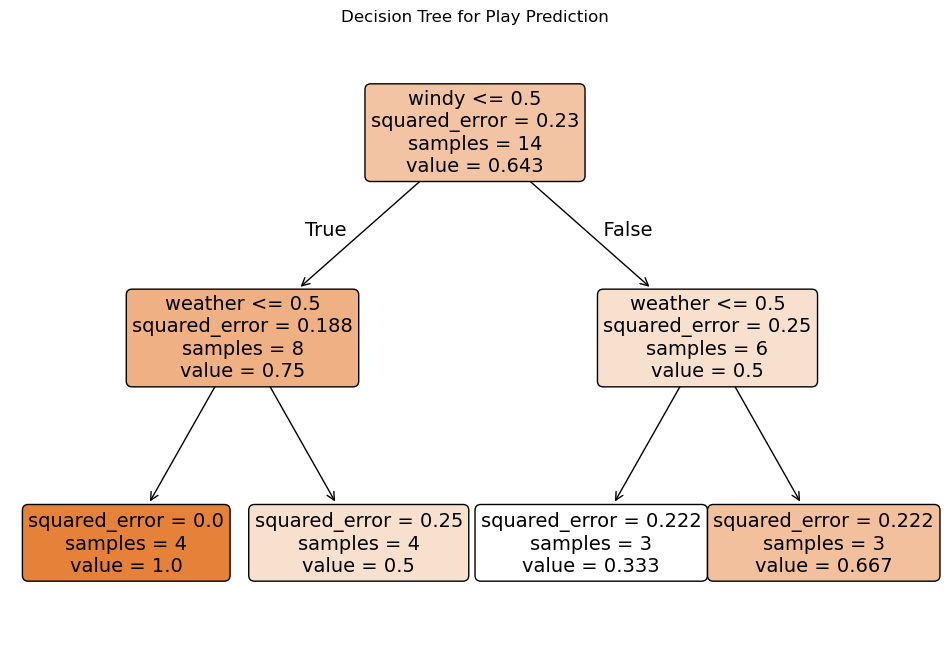

In [18]:

# ^ Visualize the decision tree

from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=X.columns, class_names=['no', 'yes'], filled=True,rounded=True)
plt.title("Decision Tree for Play Prediction")
plt.show()



In [19]:

# ^ Prediction
example_1 = pd.DataFrame([{1,0}], columns=['weather', 'windy'])  # sunny and windy
example_2 = pd.DataFrame([{1,0}], columns=['weather', 'windy'])  # rainy and not windy

pred_1 = tree.predict(example_1)[0]
pred_2 = tree.predict(example_2)[0]

print(f"Prediction for sunny and windy: {pred_1}")
print(f"Prediction for rainy and not windy: {pred_2 }")

Prediction for sunny and windy: 0.3333333333333333
Prediction for rainy and not windy: 0.3333333333333333


In [24]:

# ^ Overfitting and pruning
from sklearn.datasets import make_classification

X_big, y_big = make_classification(n_samples=1000, n_features=5, n_informative=3, n_redundant=1, random_state=42,n_classes=2)
X_train, X_test, y_train, y_test = train_test_split(X_big, y_big, test_size=0.3, random_state=42)

X_big.shape, y_big.shape

((1000, 5), (1000,))

In [ ]:

# ^ Train a deep tree vs a pruned tree
deep_tree = DecisionTreeRegressor(max_depth=15, random_state=42)
deep_tree.fit(X_train, y_train)
pruned_tree = DecisionTreeRegressor(max_depth=5, random_state=42)
pruned_tree.fit(X_train, y_train)

y_train_pred_deep = deep_tree.predict(X_train)
y_test_pred_deep = deep_tree.predict(X_test)
y_train_pred_pruned = pruned_tree.predict(X_train)
y_test_pred_pruned = pruned_tree.predict(X_test)

# ^ Evaluate performance

def evaluate_performance(y_true, y_pred, dataset_type="Test"):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, np.round(y_pred))
    f1 = f1_score(y_true, np.round(y_pred))
    print(f"{dataset_type} MSE: {mse:.4f}, R2: {r2:.4f} , Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}")

print("Deep Tree Performance:")
evaluate_performance(y_train, y_train_pred_deep, "Train")
evaluate_performance(y_test, y_test_pred_deep, "Test")

print("\nPruned Tree Performance:")
evaluate_performance(y_train, y_train_pred_pruned, "Train")
evaluate_performance(y_test, y_test_pred_pruned, "Test")


Deep Tree Performance:
Train MSE: 0.0000, R2: 1.0000 , Accuracy: 1.0000, F1 Score: 1.0000
Test MSE: 0.0567, R2: 0.7730 , Accuracy: 0.9433, F1 Score: 0.9457

Pruned Tree Performance:
Train MSE: 0.0191, R2: 0.9236 , Accuracy: 0.9771, F1 Score: 0.9764
Test MSE: 0.0592, R2: 0.7628 , Accuracy: 0.9367, F1 Score: 0.9389
